In [2]:
import torch
from srnn.utils import Trainer

trainer = Trainer(
    model_mode = 'MLP',
    func_name = 'test2',
    batch_size = 128,
    lr = 0.0001,
    seed = 0,
    cuda = 0,
)
trainer.load()

In [3]:
x = torch.linspace(-5, 5, 200)
xx = torch.meshgrid(x, x, indexing = 'ij')
X = torch.cat((xx[0].unsqueeze(0), xx[1].unsqueeze(0)), dim = 0).reshape(-1, 2)

func = lambda x: x[:, 0]**2 * x[:, 1] + x[:, 0] + 2 * x[:, 1]
Y_true = func(X).numpy()
Y_pred = trainer.model(X).squeeze(-1).detach().numpy()
Y_true.shape, Y_pred.shape

((40000,), (40000,))

In [4]:
Y_true - Y_pred

array([-140.40202 , -140.40202 , -140.40202 , ...,  103.93089 ,
        110.83766 ,  118.039375], dtype=float32)

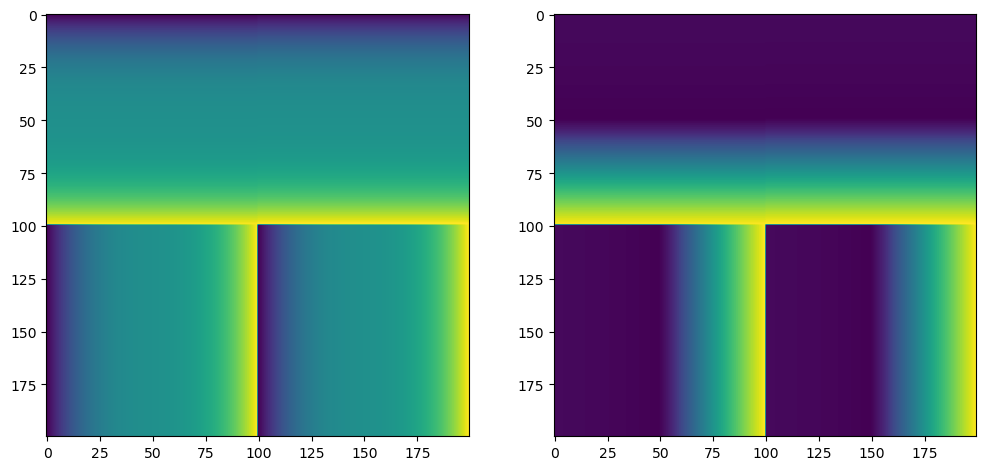

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(Y_true.reshape(200, 200))

plt.subplot(1, 2, 2)
plt.imshow(Y_pred.reshape(200, 200))